<a href="https://colab.research.google.com/github/swilsonmfc/imbalanced/blob/main/Imbalanced.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Imbalanced Learning

![](https://www.clipartkey.com/mpngs/m/94-948629_clipart-sheep-herd-sheep-black-sheep-in-white.png)

# Goals
The collection of notebooks seeks to answer:
* Why should we care?
* How does class imbalance affect our ability to predict?
* What are good metrics to assess the performance of a model?
* How can we overcome class imbalance?
* What techniques work well in practice?
* How can they be applied to well-known datasets?

# Setup

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Intuition

In [1]:
def build_frame(class_a, class_b):
  """
  Build a data frame of the class a & b values 
  """
  df = pd.DataFrame({'X': np.concatenate([class_a, class_b]), 
                    'y': np.concatenate([np.repeat(0, len(class_a)), np.repeat(1, len(class_b))])})
  return df

def generate(mu1, std1, mu2, std2, n1=950, n2=50, title=''):
  """
  Generate a plot of two gaussians with given title
  """
  class_a = np.random.normal(mu1, std1, n1)
  class_b = np.random.normal(mu2, std2, n2)
  df = build_frame(class_a, class_b)
  plt.figure(figsize=(10, 8))
  sns.kdeplot(df.X, hue=df.y)
  plt.title(title);

def generate_solution(mu1, std1, mu2, std2, n1=950, n2=50, solution=None, title1='', title2=''):
  """
  Construct a plot of two gaussians:
  One of the original data
  The other of the adjusted dataset
  """
  class_a = np.random.normal(mu1, std1, n1)
  class_b = np.random.normal(mu2, std2, n2)
  df = build_frame(class_a, class_b)

  if solution == 'OverSample':
    fix_a = class_a
    fix_b = np.random.choice(class_b, size=n1, replace=True)
  elif solution == 'UnderSample':
    fix_a = np.random.choice(class_a, size=n2, replace=True)
    fix_b = class_b
  elif solution == 'ObtainData':
    fix_a = class_a
    fix_b = np.concatenate([class_b, np.random.normal(mu2, std2, n1-n2)])
  fix_df = build_frame(fix_a, fix_b)

  fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 8), sharey=True) 
  sns.kdeplot(df.X, hue=df.y, ax=ax1) 
  ax1.set_title(title1); 
  sns.kdeplot(fix_df.X, hue=fix_df.y, ax=ax2)
  ax2.set_title(title2);

## Separable
* With separable classes, the fact that one class is much larger than another doesn't impact performance

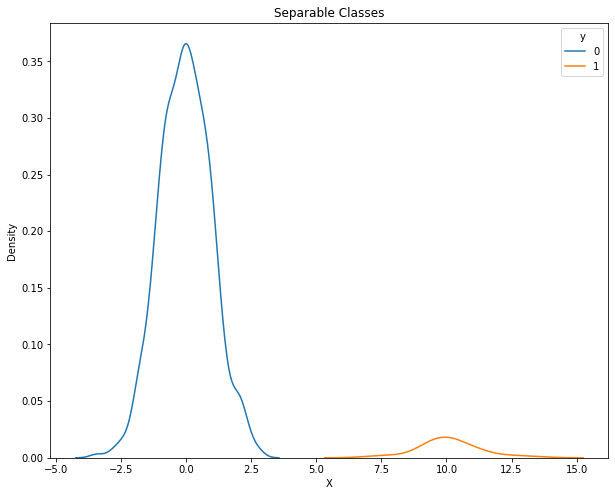

In [6]:
generate(0, 1, 10, 1, title='Separable Classes')

## Overlapping
* In an overlapping case, some cases will be difficult to classify correctly
* Overlaps will tend to favor the majority class

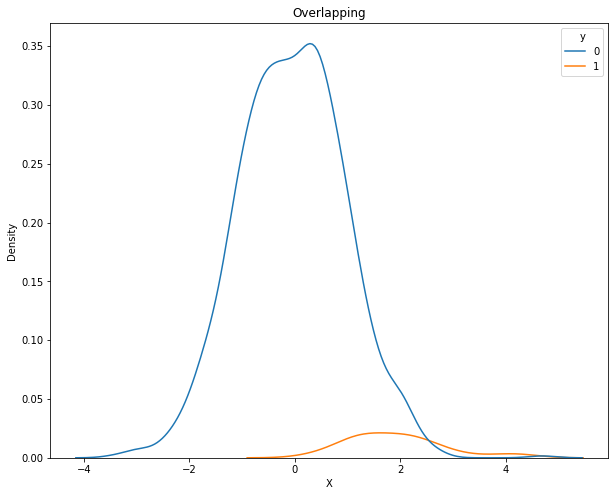

In [7]:
generate(0, 1, 2, 1, title='Overlapping')

## Covered
* Here there is little hope to classify the minority class correctly
* Algorithms will favor the majority class

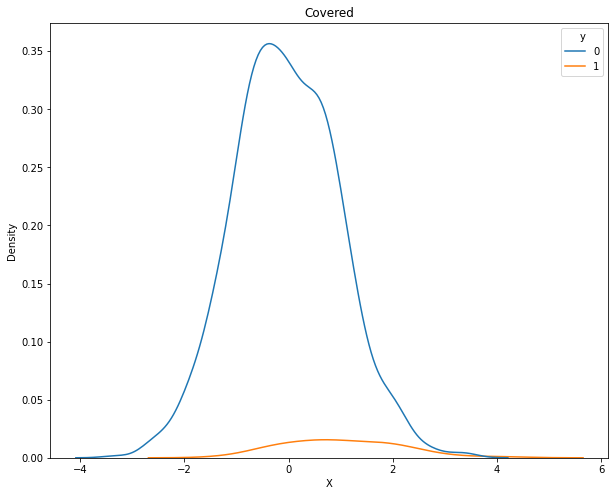

In [8]:
generate(0, 1, 1, 1, title='Covered')

# Metrics

![](https://www.statistics.com/wp-content/uploads/2020/05/Screen-Shot-2020-05-12-at-8.30.48-PM.png)

## Accuracy
* Defined as True Positives + True Negatives / Number of Observations
* Can be misleading when the imbalance is quite high
* Consider using an alternative approach when:
  * More than 75-80% belong to majority class
  * The accuracy of the positive class is more important

### Balanced Accuracy
* Alternative to Accuracy when imbalance > 75-80%
* Balanced Accuracy computes the average of percentage of positive instances correctly classified and the percentage of negative instances correctly classified. 
* It gives equal weight to these the true positive rate and true negative rate which projects a "balanced" scoring of the classifier performance.

### Example
* 100 instances, 99 of majority class and 1 of minority class
* The classifier guesses the majority class for all predictions
* We care about the performance of the minority class
* Accuracy = 99 correct / 100 instances = 99.0%
* Balanced Accuracy = [99 / 2 (99 + 0)] + [0 / 2 (1 + 0)] = 50.0%


## Precision, Recall & F-Scores
* Good alternative to accuracy when minority class is important and imbalanced
* Flows directly from a confusion matrix

![](https://cdn-images-1.medium.com/fit/t/1600/480/1*Ub0nZTXYT8MxLzrz0P7jPA.png)

### F-Score
* F-Score = Harmonic Mean of Precision and Recall
* Combines Precision & Recall
* Vary Beta (1, 2, 0.5) to emphasize Precision or Recall
* F Score variants:
  * F1 -> Cost of False Negative = False Positive
  * F2 -> Cost of False Negative > False Positive
  * F0.5 -> Cost of False Negative < False Positive




## AUC
* Use when predicting probabilities which are assigned to class labels
* We can control the threshold of assignment
* ROC Curve - Better with little / mild class imbalance
* Precision-Recall Curves - Better with mild / large imbalance

### ROC Curve
* Don't use on large imbalanced datasets
* Provide an optimistic (like Accuracy) assessment of performance

![](https://miro.medium.com/max/1000/1*thHBCWlaKWIkouryKBh6Wg.jpeg)

### Precision-Recall Curve
* ROC Curve is invariant to the proportion of positive & negative cases
* ROC Curves focus on true-positive and false-positive rates
* In contrast a precision - recall curve uses both columns of a confusion matrix
* Leads to a balanced assessment of the positive and negative cases
* Plot no-skill line using prevalence of majority class

![](https://3qeqpr26caki16dnhd19sv6by6v-wpengine.netdna-ssl.com/wp-content/uploads/2020/01/Precision-Recall-Curve-of-a-Logistic-Regression-Model-and-a-No-Skill-Classifier2.png)

## Brier Score
* Useful scoring when you're forecasting probabilities (rather than class labels)
* Used with binary classificiation outcomes
* Analagous to mean squared error
* Lower Brier scores are better
* For example:
  * Forecast = 0.75 of being correct and outcome was 1
  * Error = (0.75 - 1) ^ 2 = 0.0625
  * Mean = 1 / 1 * 0.0625 
  * Brier Score = 0.0625

![](https://www.statisticshowto.com/wp-content/uploads/2016/11/brier-score.png)

# Approaches
* When we're facing a class imbalance solution we can consider several changes to our approach
  * Adjusting our metrics
  * Balancing the data
  * Changing the model
  * Changing the optimization

## Obtain Data
* Gathering additional data for the minority class is a potentially viable solution
* This technique may be expensive or impractical

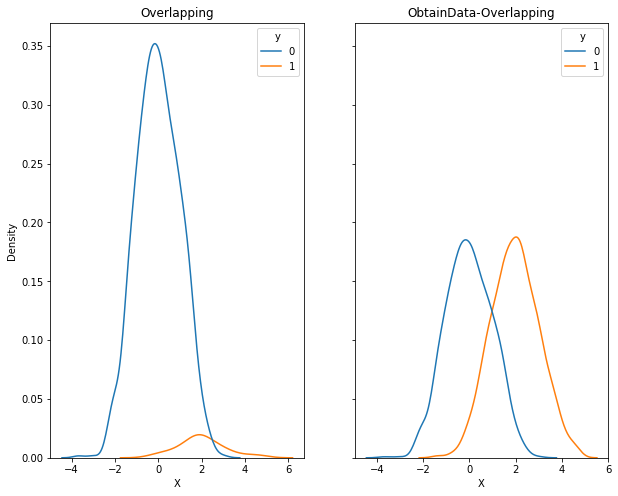

In [9]:
generate_solution(0, 1, 2, 1, 950, 50, 
                  solution='ObtainData', 
                  title1='Overlapping', 
                  title2='ObtainData-Overlapping')

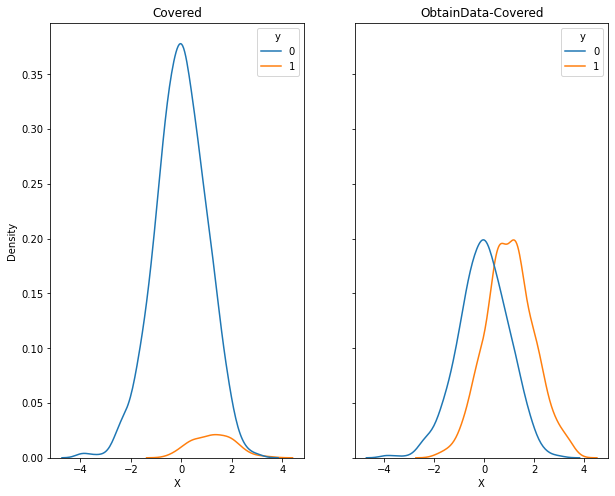

In [10]:
generate_solution(0, 1, 1, 1, 950, 50, 
                  solution='ObtainData', 
                  title1='Covered', 
                  title2='ObtainData-Covered')

## Over-Sampling
  

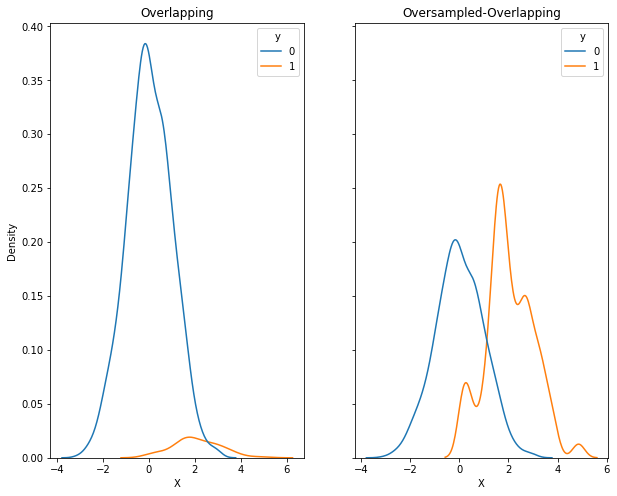

In [11]:
generate_solution(0, 1, 2, 1, 950, 50, 
                  solution='OverSample', 
                  title1='Overlapping', 
                  title2='Oversampled-Overlapping')

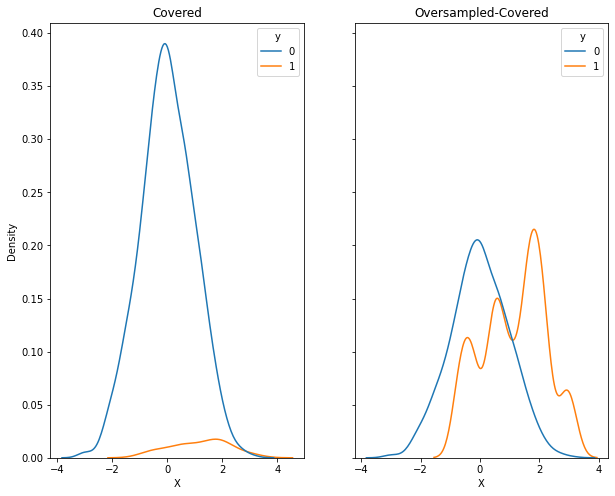

In [12]:
generate_solution(0, 1, 1, 1, 950, 50, 
                  solution='OverSample', 
                  title1='Covered', 
                  title2='Oversampled-Covered')

## Under-Sampling
* Remove data points in the majority class 
* Naively, using sampling without replacement
* Intelligently, removing easy cases, keeping decision boundary cases intact

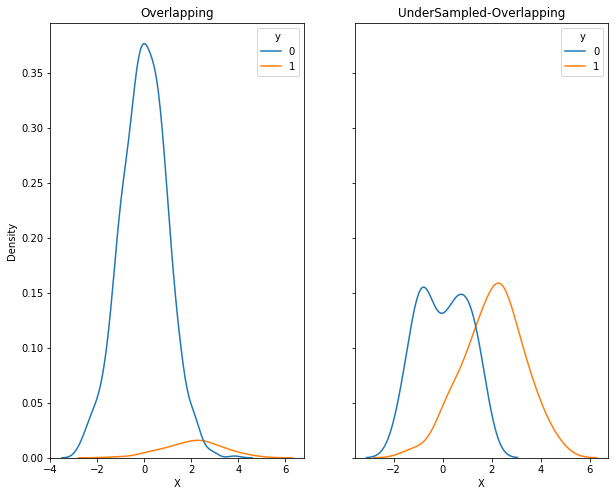

In [13]:
generate_solution(0, 1, 2, 1, 950, 50, 
                  solution='UnderSample', 
                  title1='Overlapping', 
                  title2='UnderSampled-Overlapping')

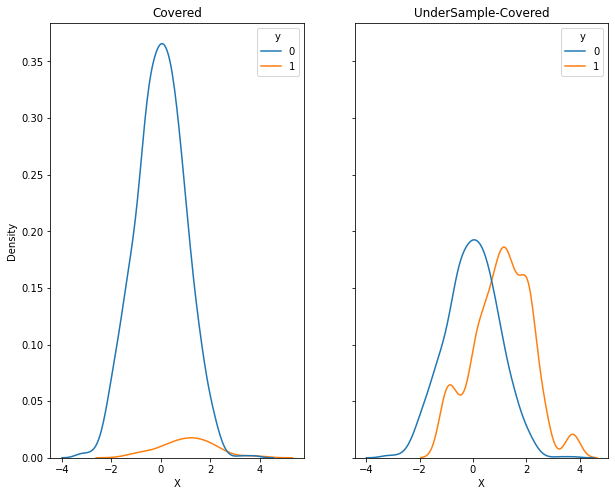

In [14]:
generate_solution(0, 1, 1, 1, 950, 50, 
                  solution='OverSample', 
                  title1='Covered', 
                  title2='UnderSample-Covered')

## Objective Function
* We may be able to use different objective functions to align our classification with the data
* Balanced:
  * Accuracy (Classes)
  * ROC-AUC (Probability)
* Imbalanced:
  * Balanced Accuracy (Classes)
  * F-Score (Classes)
  * PR-AUC (Probability)
  * Brier Score (Probability)
* Custom Loss Functions

## Cost Sensitive Approach
* In addition to changing the distribution of data we can adjust the cost of making mistakes
* By adjusting the minority class in a cost-sensitive manner, we obtain a comparable reweighting

## Tree-Based Methods
* In addition to rebalancing the entire dataset, then using a tree based method
* Tree-Based Methods (Random Forest, Decision Tree) can be adjusted for  imbalance problems
  * Subsampling can be guided by class prevalence
  * Weight adjustment made between class imbalance
* AdaBoost - Increases weight on samples mis-classified

# ToDo:
* Optimal Point (AUC Plots)